# Portfolio Optimization Methods

## Methods Implemented:
1) Efficient Frontier Techniques

2) Black-Litterman Models

3) Hierarchical Risk Parity

## Risk and Return Models


First and foremost, we calculate expected returns and a risk model for our portfolio.

We compare how well the different return and risk models predict an out-of-sample returns and the covariance matrix repectively.

Importing helper scripts and the necessary packages.
We will use yfinance for downloading the price data of the stocks we use in our portfolio universe



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import risk_models, expected_returns, plotting

For this particular analysis we will use NIFTY50 as the universe of stocks.

Pricing data does not have to be daily, but the frequency should be the same across all assets

In [2]:
#NIFTY50_TICKER = ['GOOG', 'AAPL', 'FB', 'BABA', 'AMZN', 'GE','AMD','WMT','BAC','GM','T','UAA','SHLD','XOM','RRC','BBY','MA','PFE','JPM','SBUX']

NIFTY50_TICKER=['ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS','BPCL.NS','BRITANNIA.NS','CIPLA.NS','COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS','GAIL.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'IOC.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS']
df = yf.download(NIFTY50_TICKER, period="max")
df = df["Adj Close"]
df

[*********************100%***********************]  45 of 45 completed


,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
1995-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,53.472763,NaN,NaN,NaN,NaN,NaN,NaN
1995-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-07,767.750000,2551.649902,716.750000,3866.750000,11318.450195,5493.799805,568.500000,443.149994,3461.250000,882.900024,...,358.250000,27840.000000,679.450012,302.750000,1182.349976,3132.899902,1446.500000,6481.899902,629.400024,515.250000
2021-05-10,765.450012,2556.949951,715.250000,3868.649902,11332.000000,5497.500000,572.549988,453.700012,3413.800049,900.250000,...,361.700012,27309.949219,698.200012,314.850006,1216.349976,3145.500000,1455.150024,6403.100098,674.599976,525.950012
2021-05-11,762.650024,2556.250000,707.349976,3879.300049,11193.049805,5424.700195,568.400024,462.250000,3418.399902,890.900024,...,364.649994,27513.099609,708.099976,315.549988,1233.900024,3122.600098,1435.250000,6490.600098,684.349976,518.400024


In [3]:
#df = pd.read_csv("stock_prices.csv", parse_dates=True, index_col="date")
#df

<AxesSubplot:>

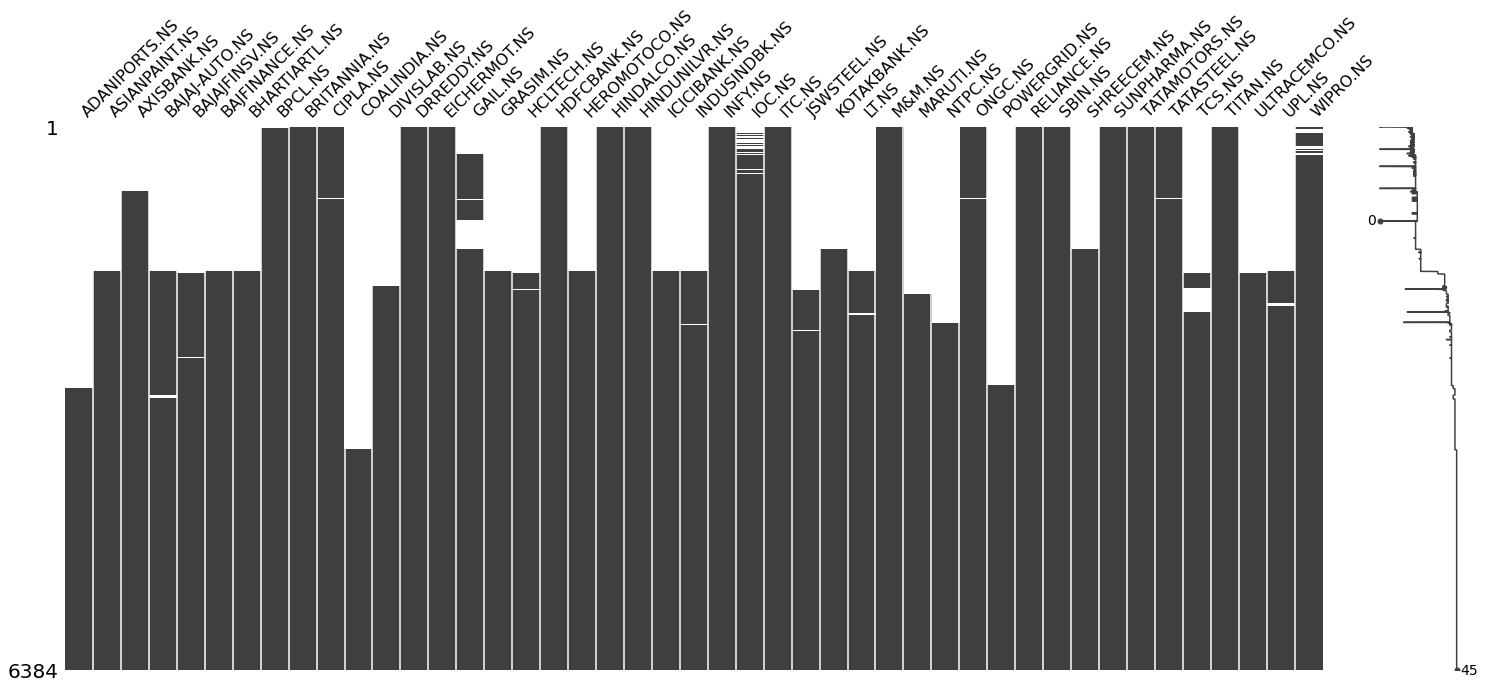

In [4]:
#visualising missing price data
import missingno as msno
msno.matrix(df)

We will drop NaN values so that portfolio allocation can be made across all stocks so that we can compare the formed
portfolio with a simple buy and hold strategy with equal allocation in all stocks in the universe.


In [5]:
df = df.dropna()
benchmark = pd.DataFrame()
benchmark["Avg"] = df.sum(axis=1)
benchmark["Returns"] = benchmark["Avg"].pct_change()
benchmark = benchmark.dropna()
benchmark

,Avg,Returns
Date,,
2010-11-08,18168.466484,-0.000151
2010-11-09,18211.919930,0.002392
2010-11-10,18120.273067,-0.005032
2010-11-11,18010.098293,-0.006080
2010-11-12,17763.916725,-0.013669
...,...,...
2021-05-07,110900.749756,0.005001
2021-05-10,110948.448898,0.000430
2021-05-11,110792.700081,-0.001404


/home/suppureme/Desktop/AT-Quant/EPAT/EPAT-PortfolioManagement/venv/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


Start date,2010-11-08
End date,2021-05-14
Total months,123
,Backtest
Annual return,19.1%
Cumulative returns,500.2%
Annual volatility,17.7%
Sharpe ratio,1.08
Calmar ratio,0.54
Stability,0.95
Max drawdown,-35.6%


/home/suppureme/Desktop/AT-Quant/EPAT/EPAT-PortfolioManagement/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/home/suppureme/Desktop/AT-Quant/EPAT/EPAT-PortfolioManagement/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/home/suppureme/Desktop/AT-Quant/EPAT/EPAT-PortfolioManagement/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() 

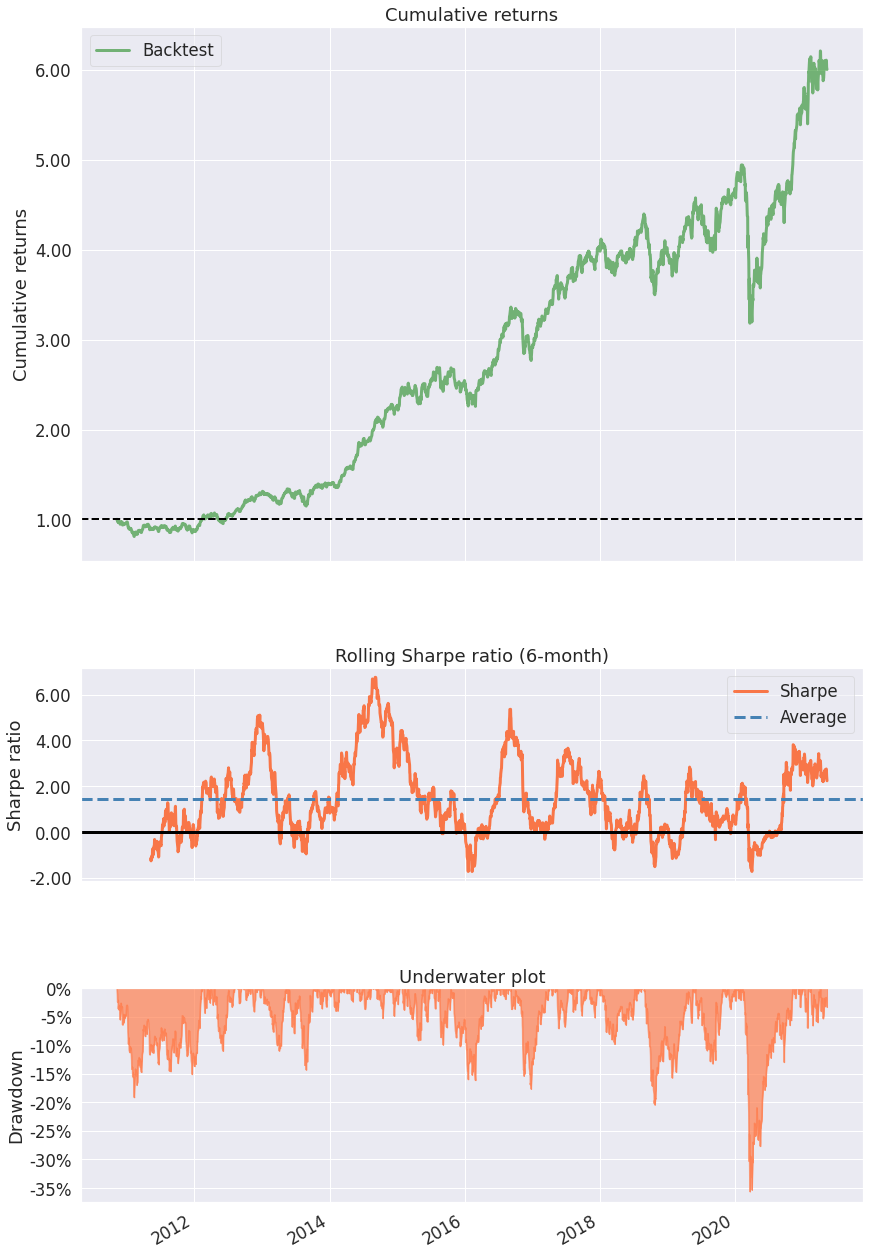

In [6]:
import pyfolio as pf

pf.create_simple_tear_sheet(benchmark["Returns"])

Methods for estimating both returns and risk are located in the helper scripts
expected_returns.py and risk_models.py respectively



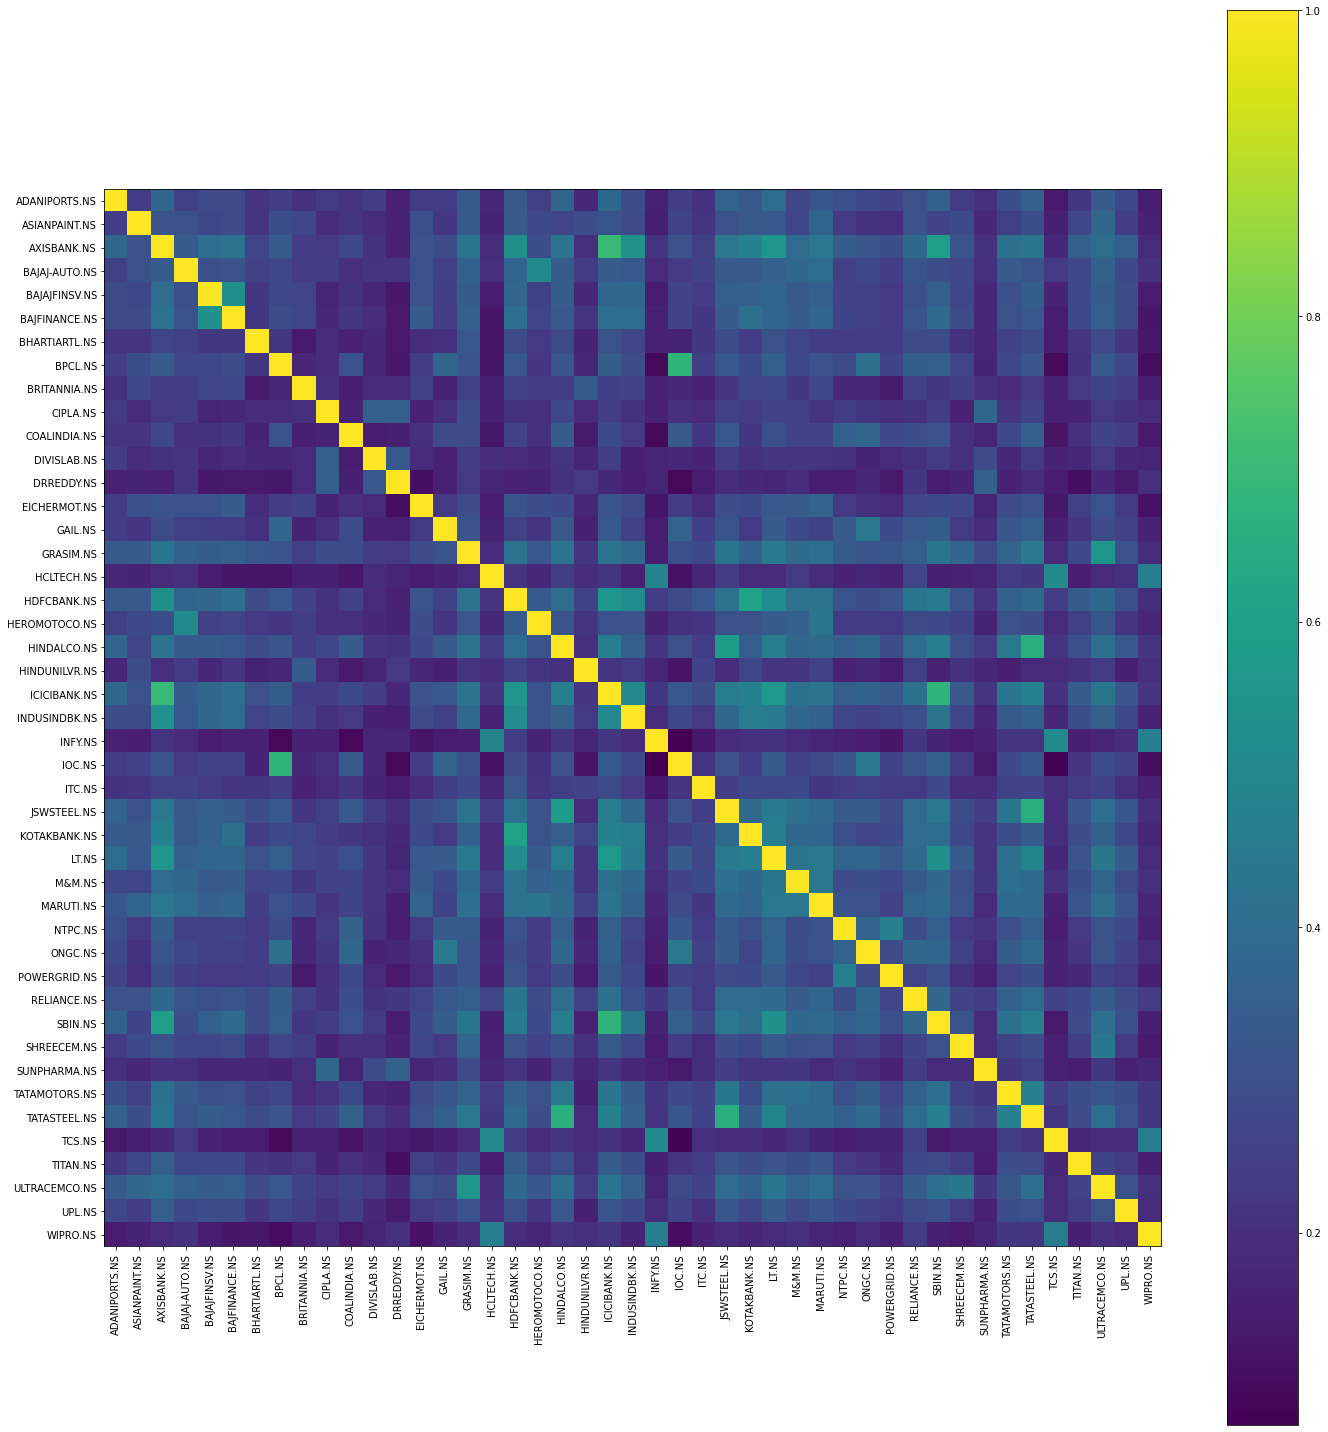

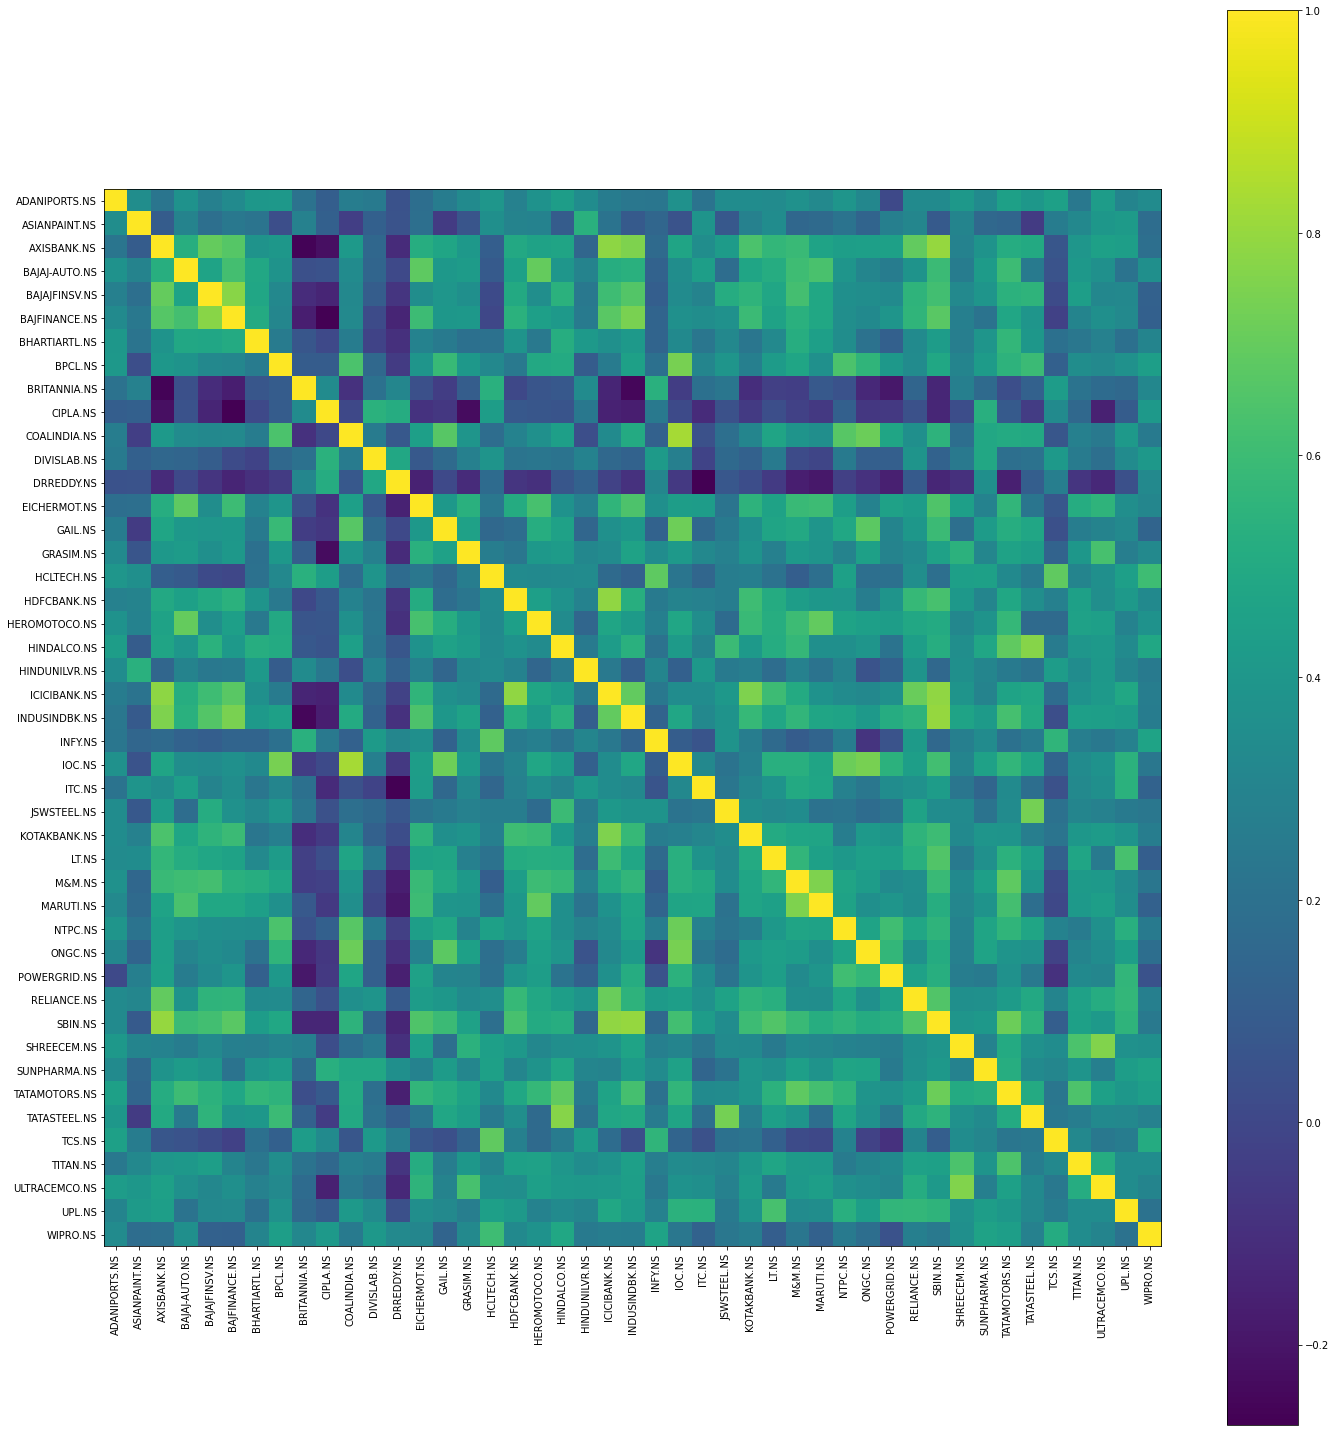

In [7]:
#Train-test split
past_df, future_df = df.iloc[:-50], df.iloc[-50:]
future_cov = risk_models.sample_cov(future_df)

sample_cov = risk_models.sample_cov(past_df)
plotting.plot_covariance(sample_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

We can see that visually, the sample covariance does not capture some of the new
features of the covariance matrix, for example the highly correlated group of stocks from the same sector.
 We may be able to improve this by using an exponentially-weighted covariance matrix,
  which gives more weight to recent data. We can also look at how each model predicts
  future variance.



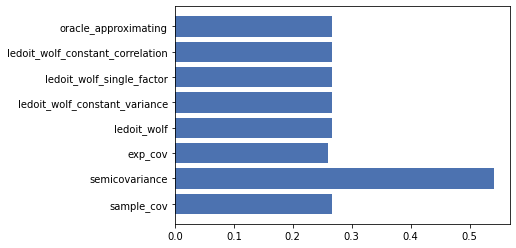

In [8]:
future_variance = np.diag(future_cov)
mean_abs_errors = []

risk_methods = [
    "sample_cov",
    "semicovariance",
    "exp_cov",
    "ledoit_wolf",
    "ledoit_wolf_constant_variance",
    "ledoit_wolf_single_factor",
    "ledoit_wolf_constant_correlation",
    "oracle_approximating",
]

for method in risk_methods:
    S = risk_models.risk_matrix(df, method=method)
    variance = np.diag(S)
    mean_abs_errors.append(np.sum(np.abs((variance - future_variance)/future_variance)) / len(variance))

xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, risk_methods)
plt.show()

We can see that the exponential covariance matrix is a much better estimator of
future variance compared to the other models.
Its mean absolute error is about 2.5%, which is actually pretty good.
Let's visually compare the exponential cov matrix to the realised future cov matrix:


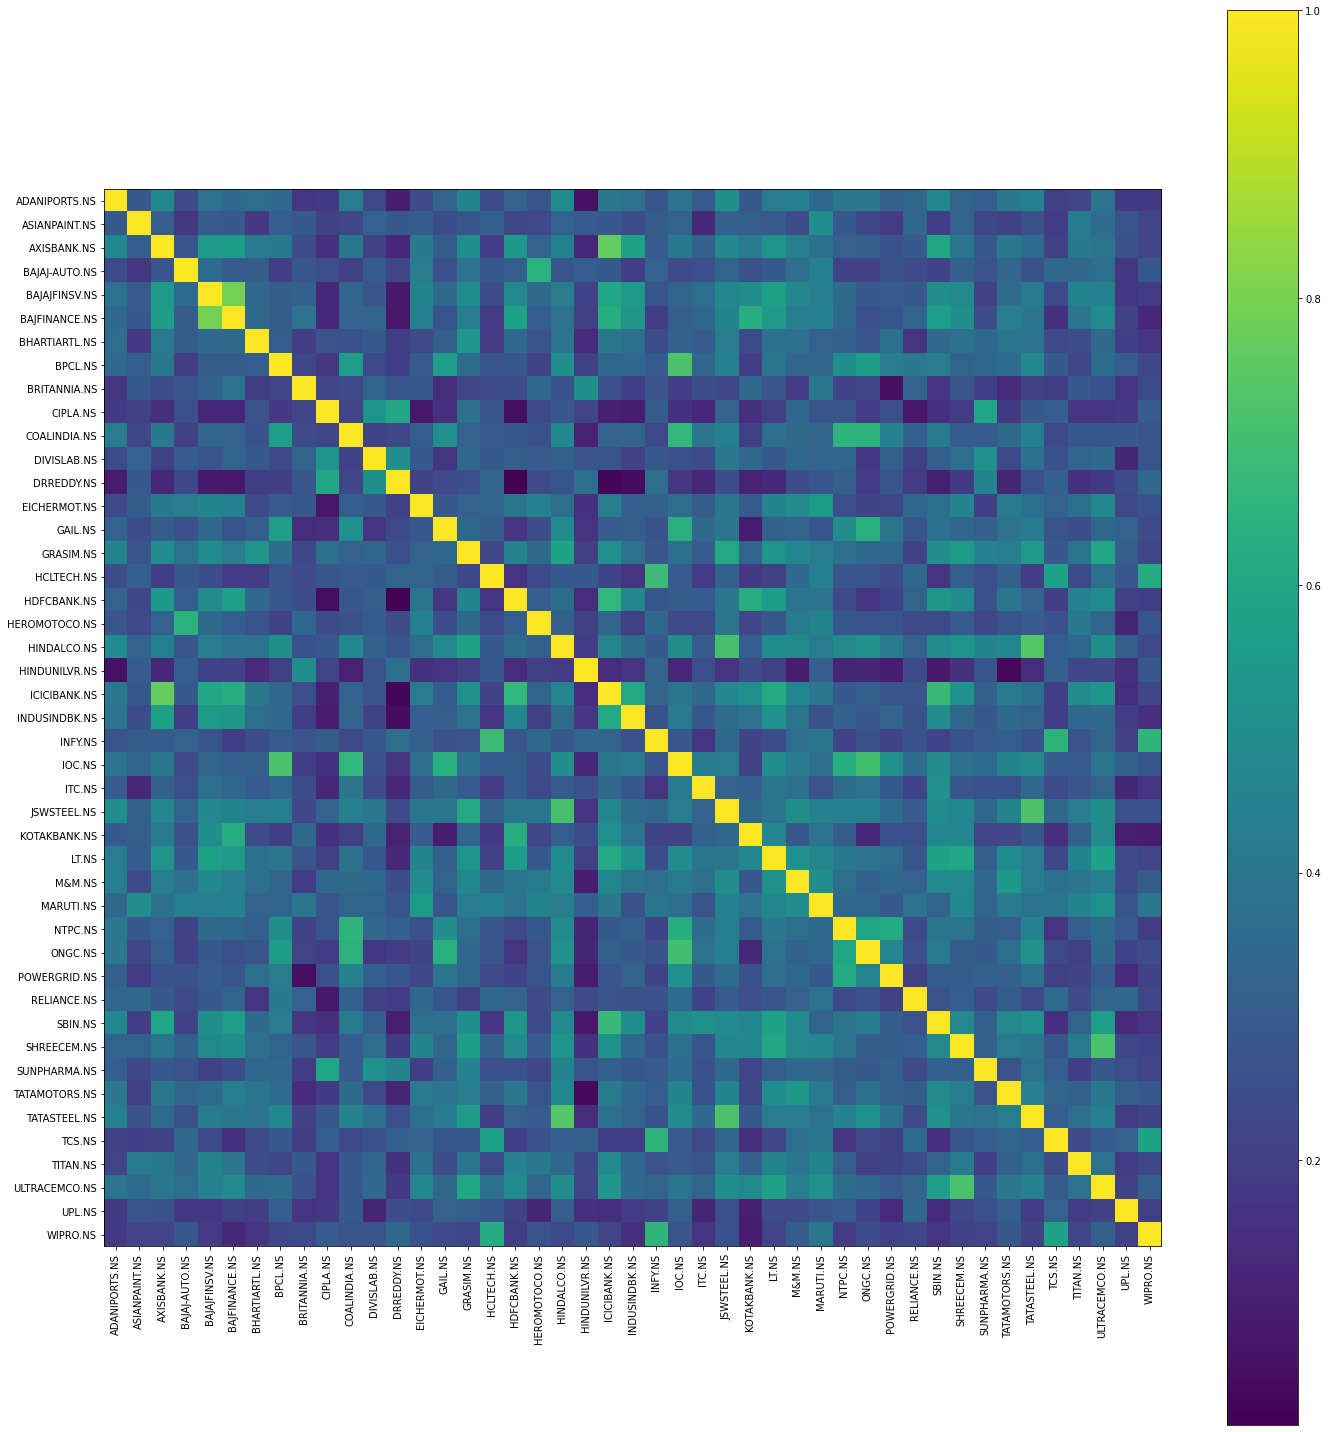

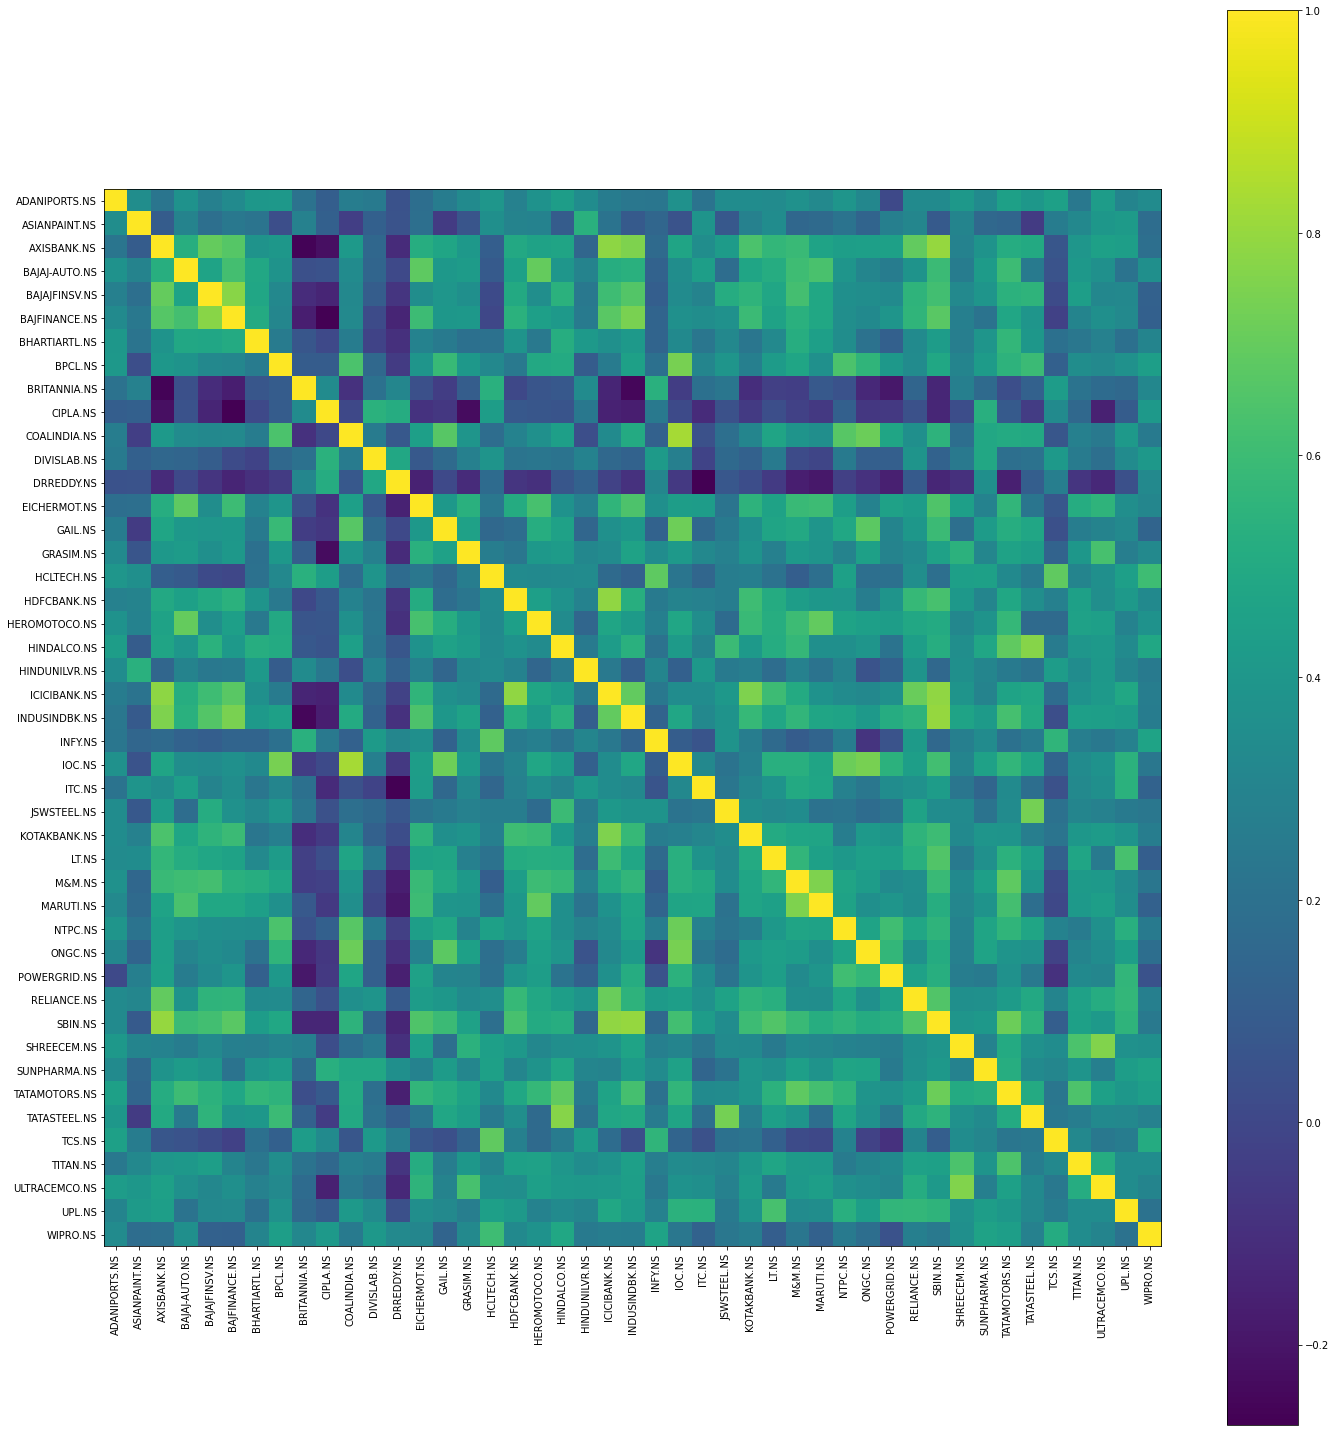

In [9]:
exp_cov = risk_models.exp_cov(past_df)
plotting.plot_covariance(exp_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

We can conduct a similar analysis for checking the best model for estimating future returns

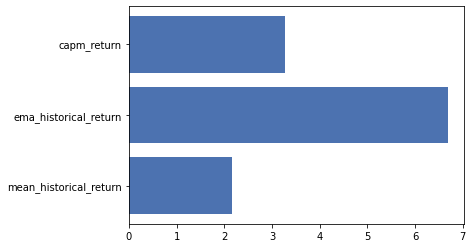

In [10]:
future_rets = expected_returns.mean_historical_return(future_df)
mean_abs_errors = []
return_methods = [
    "mean_historical_return",
    "ema_historical_return",
    "capm_return",
    ]

for method in return_methods:
    mu = expected_returns.return_model(past_df, method=method)
    mean_abs_errors.append(np.sum(np.abs((mu - future_rets)/future_rets)) / len(mu))

xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, return_methods)
plt.show()

In [11]:
print(mean_abs_errors)

[2.161524266740948, 6.6885353754989065, 3.2641258767331744]


The exponential moving average is marginally better than the others,
but the improvement is almost unnoticeable.




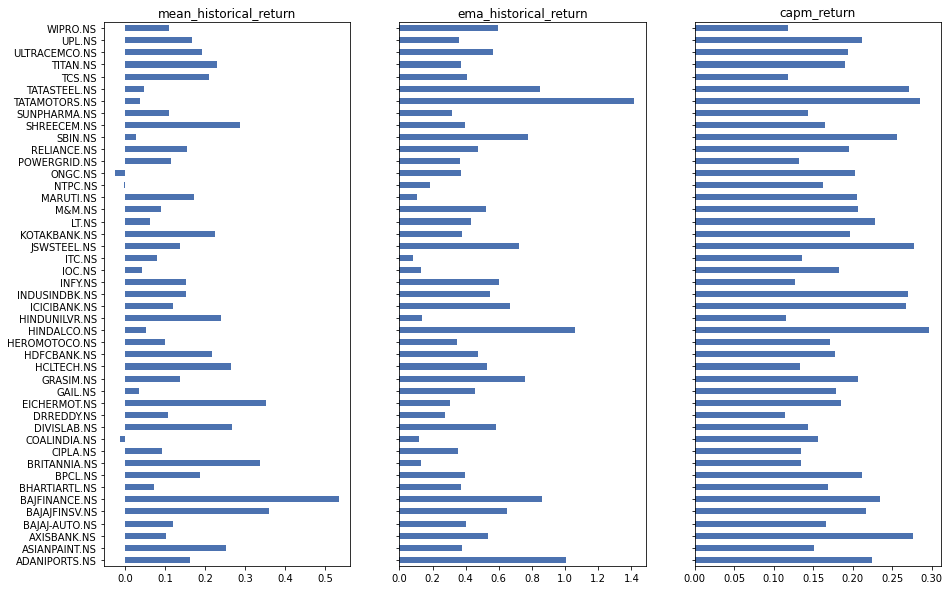

In [12]:

fig, axs = plt.subplots( 1, len(return_methods),sharey=True, figsize=(15,10))

for i, method in enumerate(return_methods):
    mu = expected_returns.return_model(past_df, method=method)
    axs[i].set_title(method)
    mu.plot.barh(ax=axs[i])

## TO DO #1
The pre-built analytical methods for predicting covariance and returns are ppoor and can be replaced with
sophisticated time-series and machine learning models

## Mean-variance optimization

To start, we need a list of tickers.

## TO DO : #2
We cannot provide the whole universe of stocks - portfolio optimization is quite different from asset selection.

Tasks:

- Calculating and visualising the covariance matrix
- Optimising a long/short portfolio to minimise total variance
- Optimising a portfolio to maximise the Sharpe ratio, subject to sector constraints
- Optimising a portfolio to maximise return for a given risk, subject to sector constraints, with an L2 regularisation objective
- Optimising a market-neutral portfolio to minimise risk for a given level of return
- Optimising along the mean-semivariance frontier
- Optimising along the mean-CVaR frontier
- Plotting the efficient frontier:
- Simple (using CLA)
- Constrained
- Complex plots

In [13]:
prices = df

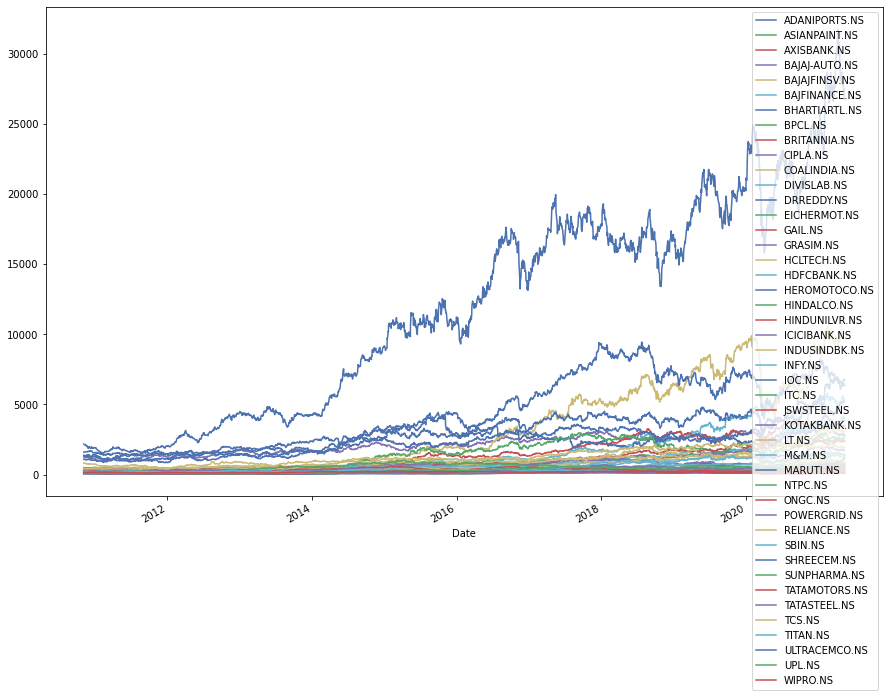

In [14]:

prices.plot(figsize=(15,10));

In [15]:
sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
ADANIPORTS.NS,0.148418,0.025445,0.054242,0.025773,0.039160,0.041676,0.027974,0.034268,0.021544,0.023520,...,0.049767,0.027304,0.024183,0.050930,0.052418,0.014528,0.029896,0.037441,0.039785,0.015777
ASIANPAINT.NS,0.025445,0.068819,0.030066,0.021069,0.025618,0.028308,0.018684,0.027196,0.019068,0.013482,...,0.024258,0.021816,0.014310,0.028329,0.028491,0.010765,0.024724,0.028245,0.025081,0.011521
AXISBANK.NS,0.054242,0.030066,0.139628,0.034117,0.054425,0.060152,0.032934,0.046004,0.023323,0.022259,...,0.079643,0.034495,0.024113,0.068346,0.060889,0.017654,0.046074,0.042592,0.049664,0.018640
BAJAJ-AUTO.NS,0.025773,0.021069,0.034117,0.069184,0.028469,0.031485,0.022655,0.025512,0.016540,0.016579,...,0.028128,0.020883,0.016619,0.039463,0.030994,0.015368,0.025343,0.026755,0.027814,0.015052
BAJAJFINSV.NS,0.039160,0.025618,0.054425,0.028469,0.125812,0.072621,0.026742,0.034794,0.025001,0.015800,...,0.045098,0.028405,0.019765,0.047373,0.047080,0.014868,0.034580,0.034566,0.039458,0.014031
BAJFINANCE.NS,0.041676,0.028308,0.060152,0.031485,0.072621,0.141341,0.028259,0.039407,0.026540,0.017287,...,0.053317,0.031854,0.020749,0.050681,0.046389,0.014212,0.036768,0.037261,0.041871,0.012847
BHARTIARTL.NS,0.027974,0.018684,0.032934,0.022655,0.026742,0.028259,0.107624,0.026464,0.012253,0.016585,...,0.034366,0.020407,0.017692,0.037172,0.035883,0.012480,0.025205,0.027003,0.027482,0.011842
BPCL.NS,0.034268,0.027196,0.046004,0.025512,0.034794,0.039407,0.026464,0.127085,0.016529,0.018157,...,0.044901,0.028181,0.018665,0.043765,0.043403,0.009163,0.026336,0.032884,0.036930,0.010685
BRITANNIA.NS,0.021544,0.019068,0.023323,0.016540,0.025001,0.026540,0.012253,0.016529,0.071460,0.014774,...,0.021100,0.019250,0.016227,0.021753,0.022705,0.011897,0.021096,0.019824,0.024678,0.011051
CIPLA.NS,0.023520,0.013482,0.022259,0.016579,0.015800,0.017287,0.016585,0.018157,0.014774,0.071758,...,0.023094,0.012609,0.031846,0.025276,0.026003,0.011433,0.015194,0.017082,0.021078,0.014035


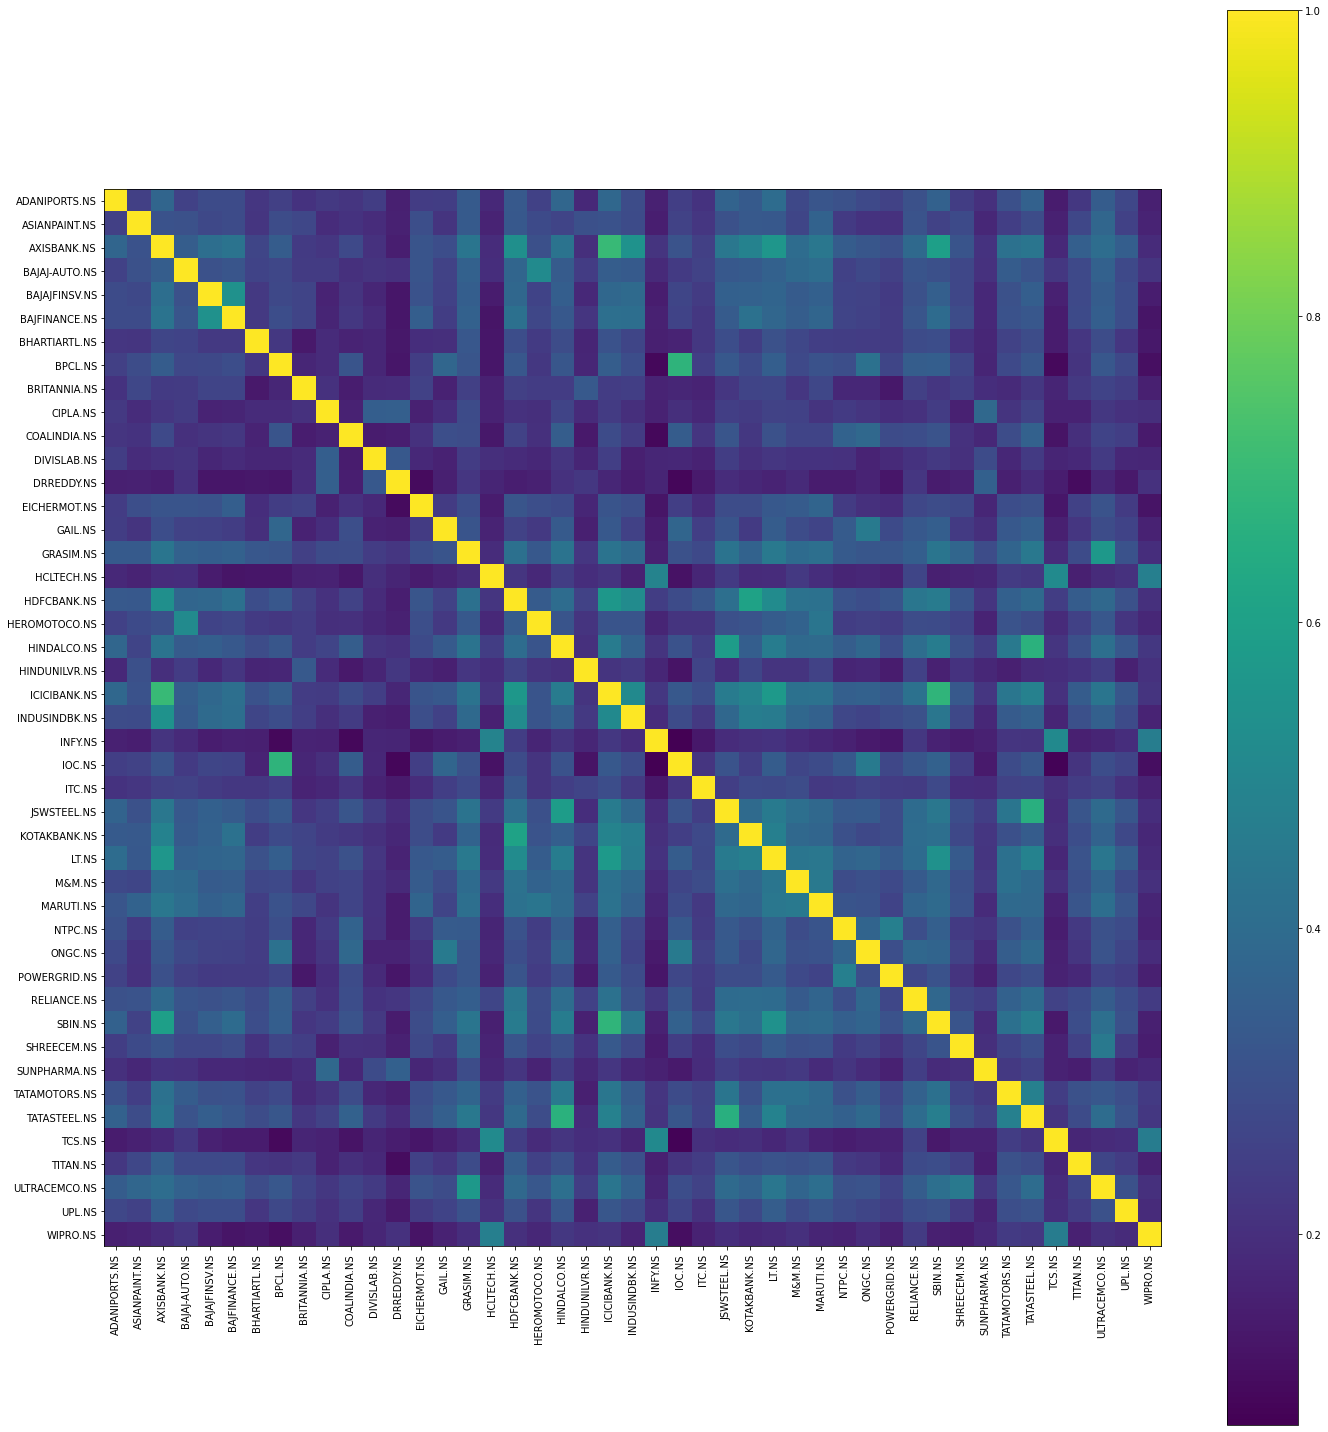

In [16]:

plotting.plot_covariance(sample_cov, plot_correlation=True);

For reasons discussed in the docs, the sample covariance matrix should not be the default choice.
A better option is Ledoit-Wolf shrinkage,
which reduces the extreme values in the covariance matrix.
In the image below, we can see that there are fewer bright spots outside the diagonal:

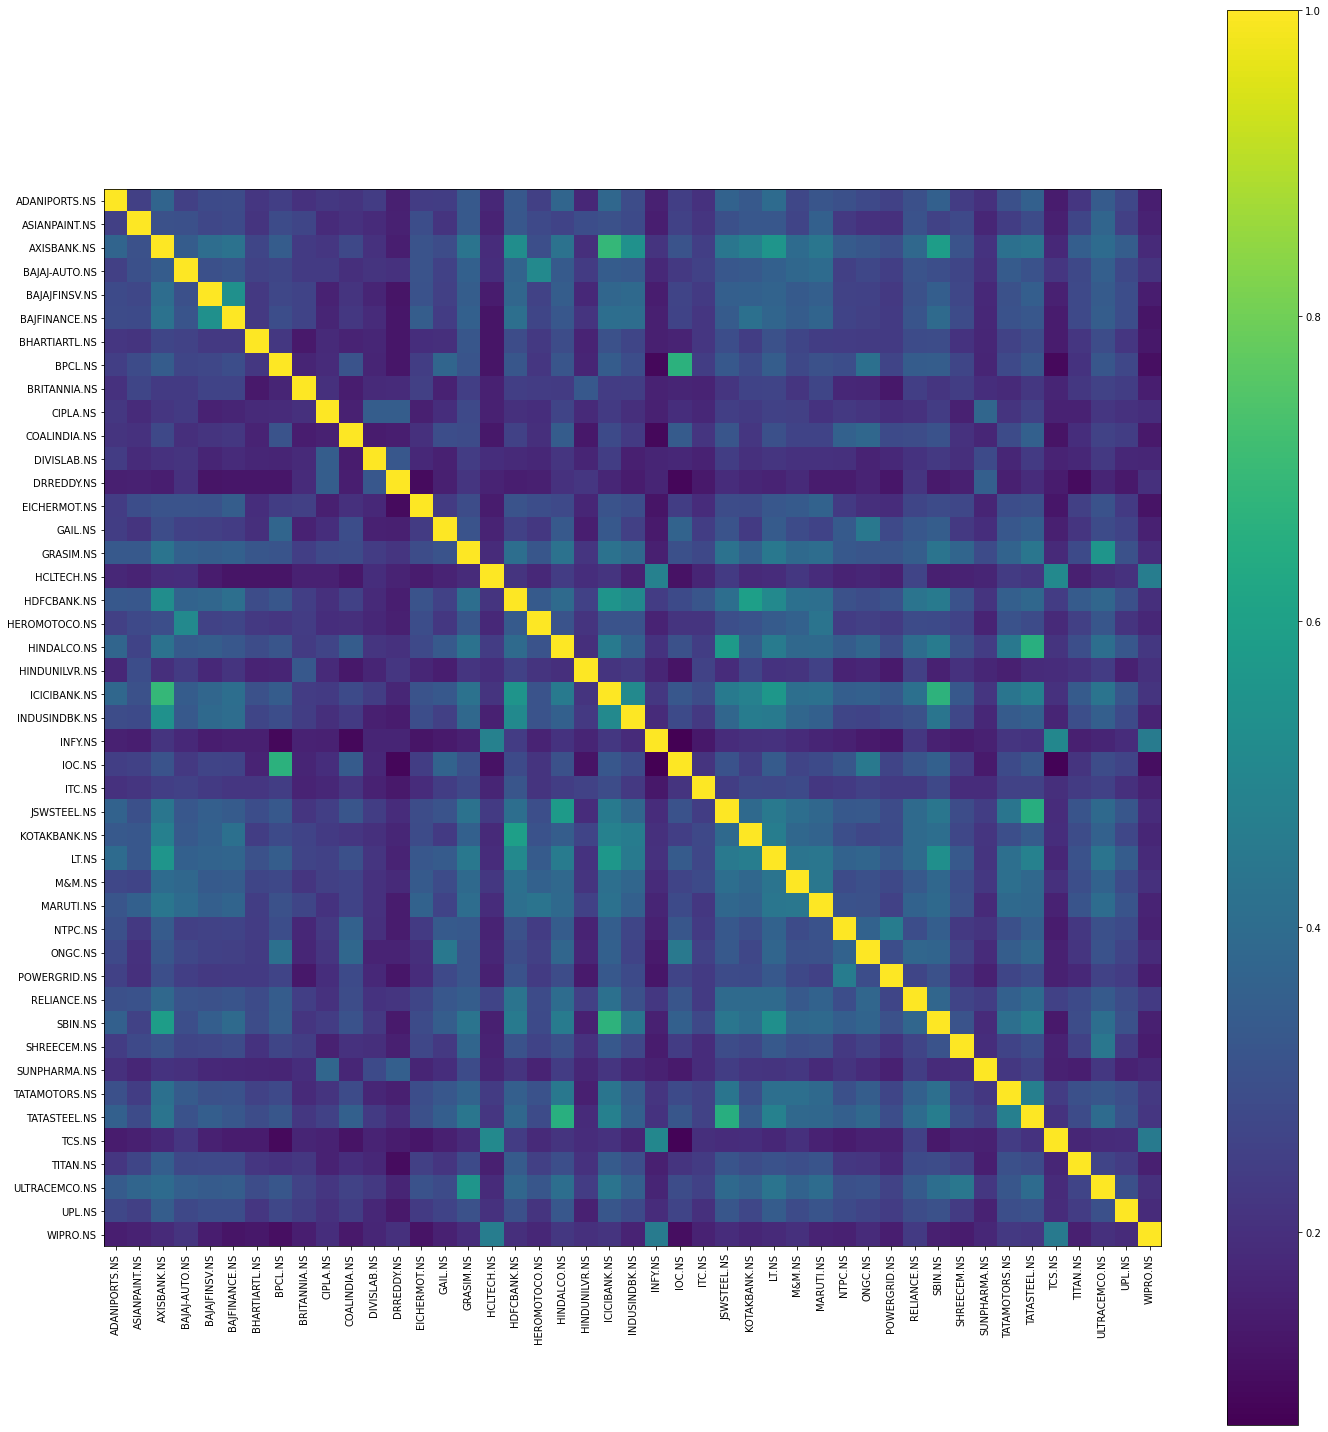

In [17]:

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

Return estimation

It is often a bad idea to provide returns using a simple estimate
like the mean of past returns.
Unless you have a proprietary method for estimating returns,
research suggests that you may be better off not providing expected returns – you
can then just find the min_volatility() portfolio or use HRP.

However, in this example we will use the CAPM returns,
which aims to be slightly more stable than the default mean historical return.


In [18]:
mu = expected_returns.capm_return(prices)
mu

ADANIPORTS.NS    0.224781
ASIANPAINT.NS    0.150005
AXISBANK.NS      0.273953
BAJAJ-AUTO.NS    0.165883
BAJAJFINSV.NS    0.217301
BAJFINANCE.NS    0.233933
BHARTIARTL.NS    0.167339
BPCL.NS          0.210303
BRITANNIA.NS     0.131915
CIPLA.NS         0.132639
COALINDIA.NS     0.156690
DIVISLAB.NS      0.142031
DRREDDY.NS       0.112025
EICHERMOT.NS     0.184548
GAIL.NS          0.180364
GRASIM.NS        0.205909
HCLTECH.NS       0.133449
HDFCBANK.NS      0.177011
HEROMOTOCO.NS    0.171921
HINDALCO.NS      0.295794
HINDUNILVR.NS    0.114691
ICICIBANK.NS     0.265018
INDUSINDBK.NS    0.268490
INFY.NS          0.125784
IOC.NS           0.182710
ITC.NS           0.134747
JSWSTEEL.NS      0.276295
KOTAKBANK.NS     0.195667
LT.NS            0.226762
M&M.NS           0.207590
MARUTI.NS        0.203018
NTPC.NS          0.162373
ONGC.NS          0.202356
POWERGRID.NS     0.133557
RELIANCE.NS      0.193816
SBIN.NS          0.254706
SHREECEM.NS      0.165128
SUNPHARMA.NS     0.143948
TATAMOTORS.N

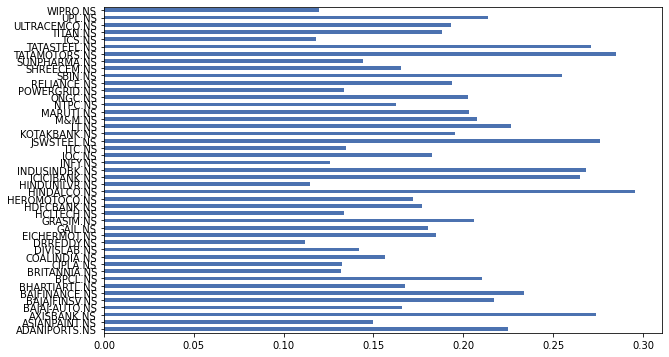

In [19]:
mu.plot.barh(figsize=(10,6));


Long/short min variance
In this section, we construct a long/short portfolio with the objective of minimising variance.
There is a good deal of research that demonstrates that these global-minimum variance (GMV)
portfolios outperform mean-variance optimized portfolios.


In [20]:
from efficient_frontier import EfficientFrontier

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('ADANIPORTS.NS', -0.00257),
             ('ASIANPAINT.NS', 0.05371),
             ('AXISBANK.NS', -0.01671),
             ('BAJAJ-AUTO.NS', 0.04116),
             ('BAJAJFINSV.NS', 0.0137),
             ('BAJFINANCE.NS', -0.01323),
             ('BHARTIARTL.NS', 0.04231),
             ('BPCL.NS', -0.02688),
             ('BRITANNIA.NS', 0.06984),
             ('CIPLA.NS', 0.06167),
             ('COALINDIA.NS', 0.07037),
             ('DIVISLAB.NS', 0.0197),
             ('DRREDDY.NS', 0.07928),
             ('EICHERMOT.NS', 0.02281),
             ('GAIL.NS', 0.03202),
             ('GRASIM.NS', -0.01848),
             ('HCLTECH.NS', 0.02),
             ('HDFCBANK.NS', 0.11013),
             ('HEROMOTOCO.NS', 0.01686),
             ('HINDALCO.NS', -0.05068),
             ('HINDUNILVR.NS', 0.08333),
             ('ICICIBANK.NS', -0.04645),
             ('INDUSINDBK.NS', -0.03891),
             ('INFY.NS', 0.04749),
             ('IOC.NS', 0.05908),
             ('ITC.NS', 

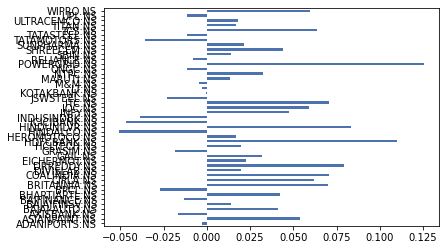

In [21]:
pd.Series(weights).plot.barh();

In [22]:
ef.portfolio_performance(verbose=True);

Annual volatility: 12.7%


In [23]:
prices


,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-11-04,152.818573,245.276398,285.197144,1250.162598,467.662628,73.884857,283.238495,81.432198,180.134964,334.497375,...,310.760742,2169.275146,211.478455,232.461487,466.820648,438.801697,178.685532,1082.951416,125.460693,146.501968
2010-11-08,153.008163,252.442017,287.320801,1242.476929,467.517120,73.779999,284.888489,79.365181,182.311829,333.493713,...,310.009583,2146.715332,216.497086,239.092194,475.608673,438.391235,178.465790,1083.723755,124.191635,144.640289
2010-11-09,153.813950,253.782150,288.502716,1249.890991,461.209778,74.386368,290.533295,79.686478,191.715836,334.497375,...,296.197662,2121.299072,219.015915,239.214645,481.692749,447.810486,178.683182,1107.859009,121.948624,144.791245
2010-11-10,151.586136,253.049957,285.012482,1222.408691,457.959106,73.848381,284.020020,80.939545,190.975723,327.567505,...,290.952637,2120.251953,219.058350,245.355606,478.763367,448.303070,193.850433,1093.088257,122.361809,146.434906
2010-11-11,147.320129,244.152725,281.134521,1217.129761,451.603241,72.571823,275.075287,80.013138,187.928131,317.196625,...,287.454468,2134.768555,219.614929,240.354294,473.993744,436.995819,192.824326,1094.874146,120.768089,143.784927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-07,767.750000,2551.649902,716.750000,3866.750000,11318.450195,5493.799805,568.500000,443.149994,3461.250000,882.900024,...,358.250000,27840.000000,679.450012,302.750000,1182.349976,3132.899902,1446.500000,6481.899902,629.400024,515.250000
2021-05-10,765.450012,2556.949951,715.250000,3868.649902,11332.000000,5497.500000,572.549988,453.700012,3413.800049,900.250000,...,361.700012,27309.949219,698.200012,314.850006,1216.349976,3145.500000,1455.150024,6403.100098,674.599976,525.950012
2021-05-11,762.650024,2556.250000,707.349976,3879.300049,11193.049805,5424.700195,568.400024,462.250000,3418.399902,890.900024,...,364.649994,27513.099609,708.099976,315.549988,1233.900024,3122.600098,1435.250000,6490.600098,684.349976,518.400024


Let's say we were happy with this portfolio and wanted to actually go out and buy the shares.
To do this, we would need to construct a discrete allocation (unless your broker
supports fractional shares!)

If we had Rs 1,00,000 to invest and would like our portfolio to be 130/30 long/short,
we can construct the actual allocation as follows:


In [24]:
from discrete_allocation import DiscreteAllocation

latest_prices = prices.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000000, short_ratio=0.3)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with Rs {leftover:.2f} leftover")
alloc

Discrete allocation performed with Rs 153.70 leftover


{'ASIANPAINT.NS': 15,
 'BAJAJ-AUTO.NS': 8,
 'BAJAJFINSV.NS': 1,
 'BHARTIARTL.NS': 57,
 'BRITANNIA.NS': 15,
 'CIPLA.NS': 51,
 'COALINDIA.NS': 362,
 'DIVISLAB.NS': 4,
 'DRREDDY.NS': 12,
 'EICHERMOT.NS': 7,
 'GAIL.NS': 159,
 'HCLTECH.NS': 16,
 'HDFCBANK.NS': 60,
 'HEROMOTOCO.NS': 5,
 'HINDUNILVR.NS': 26,
 'INFY.NS': 27,
 'IOC.NS': 442,
 'ITC.NS': 252,
 'MARUTI.NS': 2,
 'NTPC.NS': 219,
 'POWERGRID.NS': 414,
 'SBIN.NS': 29,
 'SHREECEM.NS': 1,
 'SUNPHARMA.NS': 24,
 'TCS.NS': 16,
 'TITAN.NS': 9,
 'ULTRACEMCO.NS': 2,
 'WIPRO.NS': 90,
 'ADANIPORTS.NS': -3,
 'AXISBANK.NS': -23,
 'BAJFINANCE.NS': -2,
 'BPCL.NS': -57,
 'GRASIM.NS': -13,
 'HINDALCO.NS': -123,
 'ICICIBANK.NS': -72,
 'INDUSINDBK.NS': -41,
 'JSWSTEEL.NS': -30,
 'LT.NS': -2,
 'M&M.NS': -6,
 'ONGC.NS': -94,
 'RELIANCE.NS': -4,
 'TATAMOTORS.NS': -106,
 'TATASTEEL.NS': -10,
 'UPL.NS': -14}

Max Sharpe with sector constraints

If you have your own model for returns (or have read the warnings and want to proceed anyways), you may consider maximising the Sharpe ratio. This theoretically gives the optimal portfolio in terms of risks-returns.

In this section, we construct a long-only max-sharpe portfolio, but also incorporate sector constraints. Sector constraints require three things. A sector_mapper, your sector_lower bounds, and your sector_upper bounds.



In [25]:
sector_mapper ={}
for i in range(len(NIFTY50_TICKER)):
    sector_mapper[NIFTY50_TICKER[i]]=str(yf.Ticker(NIFTY50_TICKER[i]).info['sector'])
    print(sector_mapper)

{'ADANIPORTS.NS': 'Industrials'}
{'ADANIPORTS.NS': 'Industrials', 'ASIANPAINT.NS': 'Basic Materials'}
{'ADANIPORTS.NS': 'Industrials', 'ASIANPAINT.NS': 'Basic Materials', 'AXISBANK.NS': 'Financial Services'}
{'ADANIPORTS.NS': 'Industrials', 'ASIANPAINT.NS': 'Basic Materials', 'AXISBANK.NS': 'Financial Services', 'BAJAJ-AUTO.NS': 'Consumer Cyclical'}
{'ADANIPORTS.NS': 'Industrials', 'ASIANPAINT.NS': 'Basic Materials', 'AXISBANK.NS': 'Financial Services', 'BAJAJ-AUTO.NS': 'Consumer Cyclical', 'BAJFINANCE.NS': 'Financial Services'}


KeyboardInterrupt: 

In [ ]:
sector_lower = {
    "Industrials": 0.1, # at least 10% to staples
    "Financial Services": 0.05 # at least 5% to tech
    # For all other sectors, it will be assumed there is no lower bound
}

sector_upper = {
    "Financial Services": 0.2,
    "Aerospace":0.1,
    "Consumer Cylical": 0.1,
    "Healthcare":0.15
}



We then set up the optimizer and add our constraints. We can use ef.add_objective() to add other constraints. For example, let's say that in addition to the above sector constraints, I specifically want:

10% of the portfolio in AMZN
Less than 5% of my portfolio in TSLA


In [ ]:
mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)

axis_index = ef.tickers.index("AXISBANK.NS")
ef.add_constraint(lambda w: w[axis_index] == 0.05)

hero_index = ef.tickers.index("HEROMOTOCO.NS")
ef.add_constraint(lambda w: w[hero_index] <= 0.05)

#ef.add_constraint(lambda w: w[10] >= 0.05)

ef.max_sharpe()
weights = ef.clean_weights()

In [ ]:
weights


In [ ]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [ ]:
# O(N^2) loop not a good idea in a coding interview :)
for sector in set(sector_mapper.values()):
    total_weight = 0
    for t,w in weights.items():
        if sector_mapper[t] == sector:
            total_weight += w
    print(f"{sector}: {total_weight:.3f}")

Maximise return for a given risk, with L2 regularisation

Let's imagine that we've put a lot of thought into our risk tolerance, and have decided that we can't accept anything more than 15% volatility. We can use PyPortfolioOpt to construct a portfolio that maximises return for a given risk (with the same caveats about expected returns).



In [ ]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.efficient_risk(target_volatility=0.18)
weights = ef.clean_weights()
weights

In [ ]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

In [ ]:

ef.portfolio_performance(verbose=True)

While this portfolio seems like it meets our objectives, we might be worried by the fact that a lot of the tickers have been assigned zero weight. In effect, the optimizer is "overfitting" to the data you have provided -- you are much more likely to get better results by enforcing some level of diversification. One way of doing this is to use L2 regularisation – essentially, adding a penalty on the number of near-zero weights.



In [ ]:
import objective_functions

# You must always create a new efficient frontier object
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamme is the tuning parameter
ef.efficient_risk(0.18)
weights = ef.clean_weights()
weights

In [ ]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")


We can tune the value of gamma to choose the number of nonzero tickers. Larger gamma pulls portfolio weights towards an equal allocation.


In [ ]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=1)  # gamme is the tuning parameter
ef.efficient_risk(0.18)
weights = ef.clean_weights()
weights

In [ ]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [ ]:

ef.portfolio_performance(verbose=True);

Minimise risk for a given return, market-neutral
We may instead be in the situation where we have a certain required rate of return (maybe we are a pension fund that needs 7% return a year), but would like to minimise risk. Additionally, suppose we would like our portfolio to be market neutral, in the sense that it is equally exposed to the long and short sides.


In [ ]:
# Must have no weight bounds to allow shorts
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.07, market_neutral=True)
weights = ef.clean_weights()
weights


In [ ]:
ef.portfolio_performance(verbose=True);

In [ ]:
pd.Series(weights).plot.barh(figsize=(10,6));

In [ ]:
print(f"Net weight: {sum(weights.values()):.2f}")



Efficient semi-variance optimization
In this example, we will minimise the portfolio semivariance (i.e downside volatility) subject to a return constraint (target 20%).

There are actually two ways of doing this in PyPortfolioOpt. The first is the "intuitive" way. We compute a semicovariance matrix, and pass this into EfficientFrontier (just like we would do for the exponential cov matrix or the Ledoit-Wolf shrunk matrix).


In [ ]:
semicov = risk_models.semicovariance(prices, benchmark=0)
plotting.plot_covariance(semicov);

In [ ]:
ef = EfficientFrontier(mu, semicov)
ef.efficient_return(0.2)
weights = ef.clean_weights()
weights

In [ ]:
ef.portfolio_performance(verbose=True);

However, this solution is not truly optimal in mean-semivariance space. To do the optimization properly, we must use the EfficientSemivariance class. This requires us to first compute the returns and drop NaNs.

In [ ]:
returns = expected_returns.returns_from_prices(prices)
returns = returns.dropna()

In [ ]:
from efficient_semivariance import EfficientSemivariance

es = EfficientSemivariance(mu, returns)
es.efficient_return(0.2)
es.portfolio_performance(verbose=True);

To compare this with the heuristic solution, I will use a quick hack: replacing the es.weights with es.weights and running es.portfolio_performance again. Please don't be encouraged to do this in real life!


In [ ]:

es.weights = ef.weights
es.portfolio_performance(verbose=True);

We see that the heuristic method has a significantly lower Sortino ratio, and much higher semivariance.



Efficient CVaR optimization

In this example, we will find the portfolio that maximises return subject to a CVaR constraint.

Before doing this, let's first compute the 95%-CVaR for the max-sharpe portfolio.


In [ ]:
returns = expected_returns.returns_from_prices(prices).dropna()
returns.head()

In [ ]:

ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

In [ ]:
# Compute CVaR
portfolio_rets = (returns * weight_arr).sum(axis=1)
portfolio_rets.hist(bins=50);

In [ ]:
# VaR
var = portfolio_rets.quantile(0.05)
cvar = portfolio_rets[portfolio_rets <= var].mean()
print("VaR: {:.2f}%".format(100*var))
print("CVaR: {:.2f}%".format(100*cvar))



This value of the CVaR means that our average loss on the worst 5% of days will be -3.35%. Let's say that this were beyond our comfort zone (for a \$100,000 portfolio, this would mean losing \\$3350 in a day).

Let's firstly construct the portfolio with the minimum CVaR:


In [ ]:

from efficient_cvar import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.min_cvar()
ec.portfolio_performance(verbose=True);

We have significantly reduced the CVaR, but at the cost of a large reduction in returns. We can use efficient_risk to maximise the return for a target risk. Let's say that a 2.5% CVaR is acceptable.


In [ ]:
ec = EfficientCVaR(mu, returns)
ec.efficient_risk(target_cvar=0.025)
ec.portfolio_performance(verbose=True);

We now have similar returns to before (24.7% vs 25.8%), but with a lower tail risk (2.50% CVaR vs 3.35%).

Plotting - Unconstrained
To plot the unconstrained efficient frontier, it is easiest to use the critical line algorithm.


In [ ]:
from cla import CLA

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

In [ ]:
ax = plotting.plot_efficient_frontier(cla, showfig=True)

Plotting - Constrained
In this example, we will plot the efficient frontier corresponding to portfolios with a constraint on exposure to MSFT, AMZN, and TSLA (e.g maybe we want to avoid big tech).



In [ ]:
import cvxpy as cp

mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S,)
big_tech_indices = [t in {"AXISBANK.NS", "TITAN.NS", "BRITANNIA.NS"} for t in NIFTY50_TICKER]
ef.add_constraint(lambda w: cp.sum(w[big_tech_indices]) <= 0.2)

As per the docs, before we call any optimization function, we should pass this to the plotting module:



In [ ]:
ax = plotting.plot_efficient_frontier(ef, ef_param="risk",
                                      #ef_param_range=np.linspace(0.15, 0.4, 50),
                                      showfig=False);

Complex plots

The plotting module allows you to pass in an ax, on top of which the plots are added. This allows you to build complex plots.

In this example, we will plot the efficient frontier as well as 10,000 simulated portfolios.

To generate the simulated portfolios, we will sample random weights from the Dirichlet distribution (these are already normalised):


In [ ]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Sample portfolio returns:", rets)
print("Sample portfolio volatilities:", stds)

In [ ]:
# mus = []
# stds = []
# sharpes = []
# for _ in range(10000):
#     w = np.random.dirichlet(np.ones(len(mu)))
#     # w = np.random.rand(len(mu))
#     # w /= w.sum()
#     ret = mu.dot(w)
#     std = np.sqrt(w.dot(S @ w))
#     mus.append(ret)
#     stds.append(std)
#     sharpes.append(ret / std)

In [ ]:
# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()

Advanced MVO - custom objectives¶

PyPortfolioOpt has implemented some of the most common objective functions (e.g min_volatility, max_sharpe, max_quadratic_utility, efficient_risk, efficient_return). However, sometimes yoy may have an idea for a different objective function.

In this cookbook recipe, we cover:

Mininimising transaction costs
Custom convex objectives
Custom nonconvex objectives


Acquiring data

As discussed in the previous notebook, assets are an exogenous input (i.e you must come up with a list of tickers). We will use yfinance to download data for thesee tickers


In [ ]:
mu = expected_returns.capm_return(prices)
S = risk_models.semicovariance(prices)

In [ ]:
mu.plot.barh(figsize=(10,5));

In [ ]:
plotting.plot_covariance(S, plot_correlation=True);

Min volatility with a transaction cost objective
Let's say that you already have a portfolio, and want to now optimize it. It could be quite expensive to completely reallocate, so you may want to take into account transaction costs. PyPortfolioOpt provides a simple objective to account for this.

Note: this objective will not play nicely with max_sharpe.


In [ ]:
# Pretend that you started with a default-weight allocation
initial_weights = np.array([1/len(NIFTY50_TICKER)] * len(NIFTY50_TICKER))

In [ ]:
ef = EfficientFrontier(mu, S)

# 1% broker commission
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.01)
ef.min_volatility()
weights = ef.clean_weights()
weights

Notice that many of the weights are 0.06667, i.e your original equal weight. In fact, the only change has been an allocation of AMD's weight to JD. If we lower the cost k, the allocation will change more:



In [ ]:
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.001)
ef.min_volatility()
weights = ef.clean_weights()
weights

The optimizer seems to really like JD. The reason for this is that it is highly anticorrelated to other assets (notice the dark column in the covariance plot). Hence, historically, it adds a lot of diversification. But it is dangerous to place too much emphasis on what happened in the past, so we may want to limit the asset weights.

In addition, we notice that 4 stocks have now been allocated zero weight, which may be undesirable. Both of these problems can be fixed by adding an L2 regularisation objective.

In [ ]:
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.001)
ef.add_objective(objective_functions.L2_reg)
ef.min_volatility()
weights = ef.clean_weights()
weights

This has had too much of an evening-out effect. After all, if the resulting allocation is going to be so close to equal weights, we may as well stick with our initial allocation. We can reduce the strength of the L2 regularisation by reducing gamma:



In [ ]:
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.001)
ef.add_objective(objective_functions.L2_reg, gamma=0.05)  # default is 1
ef.min_volatility()
weights = ef.clean_weights()
weights

In [ ]:
ef.portfolio_performance(verbose=True);



In [ ]:
pd.Series(weights).plot.pie(figsize=(10,10));


Custom convex objectives

PyPortfolioOpt comes with the following built-in objective functions, as of v1.2.1:

Portfolio variance (i.e square of volatility)

Portfolio return

Sharpe ratio

L2 regularisation (minimising this reduces nonzero weights)

Quadratic utility

Transaction cost model (a simple one)

However, you may want have a different objective. If this new objective is convex, you can optimize a portfolio with the full benefit of PyPortfolioOpt's modular syntax, for example adding other constraints and objectives.

To demonstrate this, we will minimise the logarithmic-barrier function suggested in the paper 60 Years of Portfolio Optimization, by Kolm et al (2014):

$$f(w, S, k) = w^T S w - k \sum_{i=1}^N \ln w$$

We must first convert this mathematical objective into the language of cvxpy. Cvxpy is a powerful modelling language for convex optimization problems. It is clean and easy to use, the only caveat is that objectives must be expressed with cvxpy functions, a list of which can be found here.


In [ ]:
import cvxpy as cp

# Note: functions are minimised. If you want to maximise an objective, stick a minus sign in it.
def logarithmic_barrier_objective(w, cov_matrix, k=0.1):
    log_sum = cp.sum(cp.log(w))
    var = cp.quad_form(w, cov_matrix)
    return var - k * log_sum


Once we have written the objective function, we can just use the ef.convex_objective() to minimise the objective.


In [ ]:

ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.2))
ef.convex_objective(logarithmic_barrier_objective, cov_matrix=S, k=0.001)
weights = ef.clean_weights()
weights

In [ ]:
ef.portfolio_performance(verbose=True);

In [ ]:

ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.2))
jd_index = ef.tickers.index('TATAMOTORS.NS')  # get the index of JD
ef.add_constraint(lambda w: w[jd_index] <= 0.15)
ef.convex_objective(logarithmic_barrier_objective, cov_matrix=S, k=0.001)
weights = ef.clean_weights()
weights

Custom nonconvex objectives
In some cases, you may be trying to optimize for nonconvex objectives. Optimization in general is a very hard problem, so please be aware that you may have mixed results in that case. Convex problems, on the other hand, are well understood and can be solved with nice theoretical guarantees.

PyPortfolioOpt does offer some functionality for nonconvex optimization, but it is not really encouraged. In particular, nonconvex optimization is not compatible with PyPortfolioOpt's modular constraints API.

As an example, we will use the Deviation Risk Parity objective from Kolm et al (2014). Because we are not using a convex solver, we don't have to define it using cvxpy functions.


In [ ]:

def deviation_risk_parity(w, cov_matrix):
    diff = w * np.dot(cov_matrix, w) - (w * np.dot(cov_matrix, w)).reshape(-1, 1)
    return (diff ** 2).sum().sum()

In [ ]:
ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.12))
ef.nonconvex_objective(deviation_risk_parity, ef.cov_matrix)
weights = ef.clean_weights()
weights


However, let's say we now want to enforce that JD has a weight of 10%. In the convex case, this would be as simple as:

ef.add_objective(lambda w: w[jd_index] == 0.10)
But unfortunately, scipy does not allow for such intuitive syntax. You will need to rearrange your constraints to make them either =0 or <= 0.

constraints = [
    # First constraint
     {"type": "eq",  # equality constraint,
      "fun": lambda w: w[1] - 0.2},  # the equality functions are assumed to = 0

    # Second constraint
    {"type": "ineq",  # inequality constraint
     "fun": lambda w: w[0] - 0.5}   # inequality functions <= 0
]
For more information, you can consult the scipy docs, but they aren't very helpful.


In [ ]:
ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.12))

ef.nonconvex_objective(
    deviation_risk_parity,
    objective_args=S,
    weights_sum_to_one=True,
    constraints=[
        {"type": "eq", "fun": lambda w: w[jd_index] - 0.10},
    ],
)

weights = ef.clean_weights()
weights

More examples of nonconvex objectives¶
The scipy format is not intuitive and is hard to explain, so here are a bunch of examples (adapted from the tests). Some of these are actually convex, so you should use convex_objective instead.

In [ ]:
# Another example of deviation risk parity
def deviation_risk_parity(w, cov_matrix):
    n = cov_matrix.shape[0]
    rp = (w * (cov_matrix @ w)) / cp.quad_form(w, cov_matrix)
    return cp.sum_squares(rp - 1 / n).value

ef = EfficientFrontier(mu, S)
ef.nonconvex_objective(deviation_risk_parity, ef.cov_matrix)
weights = ef.clean_weights()
weights

In [ ]:
# Deviation risk parity with weight bound on the first asset
ef = EfficientFrontier(mu, S)
ef.nonconvex_objective(deviation_risk_parity,
                       ef.cov_matrix,
                       constraints=[{"type":"eq", "fun":lambda w: w[0] - 0.1}])
weights = ef.clean_weights()
weights

In [ ]:
# Market-neutral efficient risk.
# Please use ef.efficient_risk() for anything serious.
target_risk = 0.19
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))

# Weights sum to zero
weight_constr = {"type": "eq", "fun": lambda w: np.sum(w)}

# Portfolio vol less than target vol
risk_constr = {
    "type": "eq",
    "fun": lambda w: target_risk ** 2 - np.dot(w.T, np.dot(ef.cov_matrix, w)),
}
constraints = [weight_constr, risk_constr]

ef.nonconvex_objective(
    lambda w, mu: -w.T.dot(mu),  # min negative return i.e max return
    objective_args=(ef.expected_returns),
    weights_sum_to_one=False,
    constraints=constraints,
)
weights = ef.clean_weights()
weights

In [ ]:
# Utility objective - you could actually use ef.max_quadratic_utility
ef = EfficientFrontier(mu, S)

def utility_obj(weights, mu, cov_matrix, k=1):
    return -weights.dot(mu) + k * np.dot(weights.T, np.dot(cov_matrix, weights))

ef.nonconvex_objective(
    utility_obj,
    objective_args=(ef.expected_returns, ef.cov_matrix, 1)
    # default is for weights to sum to 1
)

weights = ef.clean_weights()
weights

In [ ]:
ef.weights.sum()

In [ ]:
# Kelly objective with weight bounds on zeroth asset
def kelly_objective(w, e_returns, cov_matrix, k=3):
    variance = np.dot(w.T, np.dot(cov_matrix, w))
    objective = variance * 0.5 * k - np.dot(w, e_returns)
    return objective

lower_bounds, upper_bounds = 0.01, 0.3
ef = EfficientFrontier(mu, S)
ef.nonconvex_objective(
    kelly_objective,
    objective_args=(ef.expected_returns, ef.cov_matrix, 1000),
    constraints=[
        {"type": "eq", "fun": lambda w: np.sum(w) - 1},
        {"type": "ineq", "fun": lambda w: w[0] - lower_bounds},
        {"type": "ineq", "fun": lambda w: upper_bounds - w[0]},
    ],
)

weights = ef.clean_weights()
weights

Black-Litterman allocation

The Black-Litterman method is a very powerful way of converting your views on asset returns, along with your uncertainty in these views, into a portfolio.

For a description of the theory, please read the documentation page and the links therein.

In this recipe, we will cover:

Downloading data for the Black-Litterman method

Constructing the prior return vector based on market equilibrium

Two ways of constructing the uncertainty matrix

Combining Black-Litterman with mean-variance optimization

In [ ]:
market_prices = yf.download("^NSEI", period="max")["Adj Close"]
market_prices.head()

In [ ]:
mcaps = {}
for t in NIFTY50_TICKER:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
    print(mcaps)
mcaps

In [ ]:
import black_litterman
from black_litterman import BlackLittermanModel

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

In [ ]:

plotting.plot_covariance(S, plot_correlation=True);

In [ ]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

In [ ]:
market_prior.plot.barh(figsize=(10,5));

Views
In the BL method, views are specified via the matrix P (picking matrix) and the vector Q. Q contains the magnitude of each view, while P maps the views to the assets they belong to.

If you are providing absolute views (i.e a return estimate for each asset), you don't have to worry about P and Q, you can just pass your views as a dictionary.

In [ ]:
# You don't have to provide views on all the assets
viewdict = {
            "ICICIBANK.NS"  :   0.099038,
            "INDUSINDBK.NS" :   -0.070043,
            "INFY.NS"       :   0.101168,
            "IOC.NS"       :   -0.202709,
            "ITC.NS"       :   -0.070135,
            "JSWSTEEL.NS"   :   0.390563
}

bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

Black-Litterman also allows for relative views, e.g you think asset A will outperform asset B by 10%. If you'd like to incorporate these, you will have to build P and Q yourself. An explanation for this is given in the docs.




View confidences

In this section, we provide two ways that you may wish to construct the uncertainty matrix. The first is known as Idzorek's method. It allows you to specify a vector/list of percentage confidences.


In [ ]:
confidences = [
    0.6,
    0.4,
    0.2,
    0.5,
    0.7, # confident in dominos
    0.7 # confident KO will do poorly

]

In [ ]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(bl.omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [ ]:
np.diag(bl.omega)


Note how NAT, which we gave the lowest confidence, also has the highest uncertainty.

Instead of inputting confidences, we can calculate the uncertainty matrix directly by specifying 1 standard deviation confidence intervals, i.e bounds which we think will contain the true return 68% of the time. This may be easier than coming up with somewhat arbitrary percentage confidences


In [ ]:
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0)
]

In [ ]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)


Posterior estimates

Given the inputs, we can compute a posterior estimate of returns

In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)

In [ ]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

In [ ]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

In [ ]:
rets_df.plot.bar(figsize=(12,8));

Notice that the posterior is often between the prior and the views. This supports the fact that the BL method is essentially a Bayesian weighted-average of the prior and views, where the weight is determined by the confidence.

A similar but less intuitive procedure can be used to produce the posterior covariance estimate:


In [ ]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

Portfolio allocation

Now that we have constructed our Black-Litterman posterior estimate, we can proceed to use any of the optimizers discussed in previous recipes.


In [ ]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

In [ ]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [ ]:
da = DiscreteAllocation(weights, prices.iloc[-1], total_portfolio_value=20000)
alloc, leftover = da.lp_portfolio()
print(f"Leftover: ${leftover:.2f}")
alloc

Hierarchical Risk Parity

HRP is a modern portfolio optimization method inspired by machine learning.

The idea is that by examining the hierarchical structure of the market, we can better diversify.

In this cookbook recipe, we will cover:

Downloading data for HRP

Using HRP to find the minimum variance portfolio

Plotting dendrograms


In [ ]:
rets = expected_returns.returns_from_prices(prices)
rets.tail()


HRP optimization

HRP uses a completely different backend, so it is currently not possible to pass constraints or specify an objective function.


In [ ]:
from hierarchical_portfolio import HRPOpt

hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

In [ ]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [ ]:
hrp.portfolio_performance(verbose=True);

Plotting

It is very simple to plot a dendrogram (tree diagram) based on the hierarchical structure of asset returns


In [ ]:
plotting.plot_dendrogram(hrp);

If you look at this dendogram closely, you can see that most of the clusters make a lot of sense. For example, AMD and NVDA (both semiconductor manufacturers) are grouped